In [2]:
!git clone https://github.com/nickxir12/MyCLIP_first_repo.git /kaggle/working/open-clip

fatal: destination path '/kaggle/working/open-clip' already exists and is not an empty directory.


In [80]:
# Step 1: Delete the old repo (if it exists)
!rm -rf /kaggle/working/open-clip  

# Step 2: Clone the latest version from GitHub
!git clone https://github.com/nickxir12/MyCLIP_first_repo.git /kaggle/working/open-clip

Cloning into '/kaggle/working/open-clip'...
remote: Enumerating objects: 3650, done.
remote: Counting objects: 100% (3650/3650), done.
remote: Compressing objects: 100% (1392/1392), done.
remote: Total 3650 (delta 2217), reused 3592 (delta 2159), pack-reused 0 (from 0)
Receiving objects: 100% (3650/3650), 15.32 MiB | 39.61 MiB/s, done.
Resolving deltas: 100% (2217/2217), done.


In [4]:
#!pip install open_clip_torch
!pip install braceexpand
!pip install webdataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 3.6 MB/s eta 0:00:00


In [5]:
!pip install -r /kaggle/working/open-clip/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.2 MB/s eta 0:00:00


In [43]:
# !pip install --upgrade --force-reinstall numpy torch torchvision torchaudio transformers scikit-learn --no-cache-dir


In [44]:
# !pip install --upgrade --force-reinstall numpy==1.23.5
# !pip install --force-reinstall --no-cache-dir scipy==1.9.3


In [45]:
# import os
# os._exit(00)


In [7]:
import sys
sys.path.append("/kaggle/working/open-clip/src")
sys.path.append("/kaggle/working/open-clip/src/open_clip")


In [8]:
import open_clip

import open_clip_train  # Try importing manually


In [ ]:
#                Preparing train datasaet

In [9]:
import json
import pandas as pd

# Load Karpathy JSON file
karpathy_json_path = "/kaggle/input/karpathy-splits/dataset_flickr30k.json"
with open(karpathy_json_path, "r") as f:
    karpathy_data = json.load(f)

# Extract training set
train_data = [item for item in karpathy_data["images"] if item["split"] == "train"]

# Prepare data for CSV
train_records = []
for item in train_data:
    img_filename = f"/kaggle/input/flickr30k/Images/{item['filename']}"
    for sentence in item["sentences"]:
        caption = sentence["raw"]
        train_records.append({"image": img_filename, "caption": caption})

# Convert to DataFrame
df_train = pd.DataFrame(train_records)

# Save to CSV (formatted properly)
csv_path = "/kaggle/working/train_data_karpathy.csv"
df_train.to_csv(csv_path, index=True, index_label="id")

print(f"✅ CSV file saved at: {csv_path}")


✅ CSV file saved at: /kaggle/working/train_data_karpathy.csv


In [10]:
df_train.head()

,image,caption
0,/kaggle/input/flickr30k/Images/1000092795.jpg,Two young guys with shaggy hair look at their ...
1,/kaggle/input/flickr30k/Images/1000092795.jpg,"Two young, White males are outside near many b..."
2,/kaggle/input/flickr30k/Images/1000092795.jpg,Two men in green shirts are standing in a yard.
3,/kaggle/input/flickr30k/Images/1000092795.jpg,A man in a blue shirt standing in a garden.
4,/kaggle/input/flickr30k/Images/1000092795.jpg,Two friends enjoy time spent together.


In [172]:
#!python /kaggle/working/open-clip/src/open_clip_train/main.py --help

In [ ]:
#               Training below

In [88]:
#   Fine tune the pre trained model on flickr30k
!python /kaggle/working/open-clip/src/open_clip_train/main.py \
    --train-data /kaggle/working/train_data_karpathy.csv \
    --dataset-type csv \
    --csv-img-key image \
    --csv-caption-key caption \
    --csv-separator "," \
    --model ViT-B-32 \
    --pretrained 'laion2b_s34b_b79k' \
    --batch-size 48 \
    --lr 5e-6 \
    --warmup 1000 \
    --epochs 1 \
    --lr-scheduler cosine \
    --precision amp \
    --workers 4 \
    --logs "logs" \
    --logs "checkpoints" \
    --save-frequency 1 \
    --seed 42 \
    --lambda_dino 0.25 \
    #--use_soft_labels \
    --soft_temprature 0.05 \
    --alpha 0  \


2025-03-21 16:10:25.925119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-21 16:10:25.946492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-21 16:10:25.953155: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Using device: cuda
['/kaggle/working/open-clip/src/open_clip_train/main.py', '--train-data', '/kaggle/working/train_data_karpathy.csv', '--dataset-type', 'csv', '--csv-img-key', 'image', '--csv-caption-key', 'caption', '--csv-separator', ',', '--model', 'ViT-B-32', '--pretrained', 'laion2b_s34b_b79k', '--batch-size', '48', '--lr', '5e-6', '--warmup', '1000', '--e

In [99]:
!ls checkpoints/


2025_03_21-10_41_57-model_ViT-B-32-lr_5e-06-b_48-j_2-p_amp
2025_03_21-10_50_13-model_ViT-B-32-lr_5e-06-b_48-j_2-p_amp
2025_03_21-10_53_55-model_ViT-B-32-lr_5e-06-b_48-j_2-p_amp
2025_03_21-10_54_41-model_ViT-B-32-lr_5e-06-b_48-j_2-p_amp
2025_03_21-12_07_56-model_ViT-B-32-lr_5e-06-b_48-j_2-p_amp
2025_03_21-12_58_58-model_ViT-B-32-lr_5e-06-b_128-j_6-p_amp
2025_03_21-13_00_20-model_ViT-B-32-lr_5e-06-b_128-j_4-p_amp
2025_03_21-13_50_11-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp
2025_03_21-13_51_26-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp
2025_03_21-14_31_37-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp
2025_03_21-14_44_12-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp
2025_03_21-15_08_15-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp
2025_03_21-15_10_58-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp
2025_03_21-15_14_11-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp
2025_03_21-15_16_05-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp
2025_03_21-15_18_21-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp
2025_03_21-15_19_05-model_ViT-B-32-lr_5e-06-b_48-j_4-p

In [113]:
!ls checkpoints/2025_03_21-13_51_26-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp/checkpoints  


epoch_1.pt


In [ ]:
# 2025_03_21-15_19_05-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp is lamba=0.1
#2025_03_21-13_51_26-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp  is  plain ft

In [ ]:
#         loading model

In [114]:
import torch
import open_clip

# Path to your trained checkpoint
checkpoint_path = "checkpoints/2025_03_21-13_51_26-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp/checkpoints/epoch_1.pt"

# 1. Create the model architecture from scratch (without loading pretrained weights)
model_ft_mod, preprocess_ft, preprocess_val = open_clip.create_model_and_transforms(
    "ViT-B-32", pretrained=None
)

# 2. Load the trained checkpoint manually
checkpoint = torch.load(checkpoint_path, map_location="cpu",weights_only=True)

# If the state_dict is nested under a key (like "state_dict"), adjust accordingly
if "state_dict" in checkpoint:
    checkpoint = checkpoint["state_dict"]

# Load checkpoint weights into model
model_ft_mod.load_state_dict(checkpoint, strict=False)  # Use strict=False to avoid missing keys error

# 3. Move model to GPU (if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_ft_mod = model_ft_mod.to(device)

print("Model loaded successfully!")

Model loaded successfully!


In [93]:
tokenizer = open_clip.get_tokenizer('ViT-B-32')

In [115]:
model_ft_mod.eval()

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): GELU(approximate='none')
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine

**START TESTING BELOW**

In [ ]:
# Function evaluate_model for evaluating our models (on retreival task) and returns top-k accuracies


In [23]:
import numpy as np
from PIL import Image
from tqdm import tqdm
import json

# Load Karpathy split JSON file as a test set
karpathy_json_path = "/kaggle/input/karpathy-splits/dataset_flickr30k.json"
with open(karpathy_json_path, "r") as f:
    karpathy_data = json.load(f)

# Extract test set
test_data = [item for item in karpathy_data["images"] if item["split"] == "test"]

import numpy as np
import torch
from PIL import Image
from tqdm import tqdm
import json
import pandas as pd
import matplotlib.pyplot as plt
def evaluate_model(model, preprocess, tokenizer, test_data, image_folder, device, top_k=5, captions_per_image=5):
    """
    Evaluates an image-text retrieval model using a preloaded test dataset.

    Args:
        model: The OpenCLIP model to use for encoding.
        preprocess: The preprocessing function for images.
        tokenizer: The tokenizer for text encoding.
        test_data (list): Preloaded test dataset (list of image-caption dictionaries).
        image_folder (str): Path to the folder containing Flickr30k images.
        device: PyTorch device (e.g., "cuda" or "cpu").
        top_k (int): Number of top retrieved captions/images to consider.
        captions_per_image (int): Number of captions associated with each image.

    Returns:
        DataFrame containing image paths, retrieved captions, and similarity scores.
    """

    # Store extracted features
    image_features = []
    text_features = []
    image_paths = []
    captions = []
    caption_to_image = {}

    # Process each test image
    for item in tqdm(test_data, desc="Extracting Features"):
        img_path = f"{image_folder}/{item['filename']}"
        image_paths.append(img_path)

        # Encode image
        image = preprocess(Image.open(img_path).convert("RGB")).unsqueeze(0).to(device)
        with torch.no_grad():
            img_feat = model.encode_image(image)
        image_features.append(img_feat.cpu().numpy())

        # Encode captions
        for sentence in item["sentences"]:
            text = sentence["raw"]
            text_tokenized = tokenizer([text]).to(device)

            with torch.no_grad():
                text_feat = model.encode_text(text_tokenized)

            text_features.append(text_feat.cpu().numpy())
            captions.append(text)
            caption_to_image[text] = img_path  # Store which image the caption belongs to

    # Convert to numpy arrays
    image_features = np.vstack(image_features)
    text_features = np.vstack(text_features)

    print(f"✅ Extracted {image_features.shape[0]} image features and {text_features.shape[0]} text features.")

    # Normalize features
    image_features = image_features / np.linalg.norm(image_features, axis=1, keepdims=True)
    text_features = text_features / np.linalg.norm(text_features, axis=1, keepdims=True)

    # Compute similarity matrix (dot product)
    similarity_matrix = np.dot(text_features, image_features.T)

    # Compute retrieval accuracy
    def evaluate_retrieval(similarity_matrix, top_k=1, captions_per_image=5):
        N_captions, N_images = similarity_matrix.shape
        assert N_captions == N_images * captions_per_image, \
            f"Number of captions ({N_captions}) must be {captions_per_image} times the number of images ({N_images})."
        
        top_k_indices = np.argsort(similarity_matrix, axis=1)[:, -top_k:]
        correct = 0
        for caption_idx in range(N_captions):
            correct_image_idx = caption_idx // captions_per_image
            if correct_image_idx in top_k_indices[caption_idx]:
                correct += 1
        return correct / N_captions

    # Compute accuracy for top-1, top-5, top-10
    for k in [1, 5, 10]:
        acc = evaluate_retrieval(similarity_matrix, top_k=k, captions_per_image=captions_per_image)
        print(f"Top-{k} Accuracy: {acc * 100:.2f}%")

    # Retrieve top-k captions per image
    top_k_indices = np.argsort(similarity_matrix, axis=0)[-top_k:].T  # Sorting and taking top-k

    # Store results
    results = []
    for img_idx, indices in enumerate(top_k_indices):
        img_path = image_paths[img_idx]  
        retrieved_captions = [captions[idx] for idx in indices[::-1]]  
        retrieved_probs = [similarity_matrix[idx, img_idx] for idx in indices[::-1]]  

        results.append({
            "Image": img_path,
            "Top-5 Matches": list(zip(retrieved_captions, retrieved_probs))
        })

    # Convert to DataFrame
    df_results = pd.DataFrame(results)

    return df_results


In [35]:
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
model = model.to(device)
model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
tokenizer = open_clip.get_tokenizer('ViT-B-32')


In [36]:
# Evaluate fine tuned model
df_results_model = evaluate_model(
    model=model,
    preprocess=preprocess,
    tokenizer=tokenizer,
    test_data=test_data,  # Reuse preloaded test data
    image_folder="/kaggle/input/flickr30k/Images",
    device="cuda"
)

Extracting Features: 100%|██████████| 1000/1000 [00:49<00:00, 20.25it/s]


✅ Extracted 1000 image features and 5000 text features.
Top-1 Accuracy: 66.76%
Top-5 Accuracy: 88.34%
Top-10 Accuracy: 93.12%


In [116]:
# Evaluate pre trained model
df_results_model_ft_mod = evaluate_model(
    model=model_ft_mod,
    preprocess=preprocess_val,
    tokenizer=tokenizer,
    test_data=test_data,  # Reuse preloaded test data
    image_folder="/kaggle/input/flickr30k/Images",
    device="cuda"
)

Extracting Features: 100%|██████████| 1000/1000 [00:50<00:00, 19.99it/s]


✅ Extracted 1000 image features and 5000 text features.
Top-1 Accuracy: 72.74%
Top-5 Accuracy: 92.24%
Top-10 Accuracy: 96.00%


In [95]:
# Evaluate pre trained model
df_results_model_ft_mod = evaluate_model(
    model=model_ft_mod,
    preprocess=preprocess_val,
    tokenizer=tokenizer,
    test_data=test_data,  # Reuse preloaded test data
    image_folder="/kaggle/input/flickr30k/Images",
    device="cuda"
)

Extracting Features: 100%|██████████| 1000/1000 [00:50<00:00, 19.83it/s]


✅ Extracted 1000 image features and 5000 text features.
Top-1 Accuracy: 72.88%
Top-5 Accuracy: 92.28%
Top-10 Accuracy: 95.86%


In [ ]:
#     Modality gap an other metrics below to test the created space

In [117]:
karpathy_json_path = "/kaggle/input/karpathy-splits/dataset_flickr30k.json"
with open(karpathy_json_path, "r") as f:
    karpathy_data = json.load(f)

# Extract test set
test_data = [item for item in karpathy_data["images"] if item["split"] == "test"]

In [136]:
import torch
import json
from torch.nn.functional import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [119]:
def compute_centroids(image_embeddings, text_embeddings):
    """
    Compute the centroids of image and text embeddings.
    
    Args:
        image_embeddings: Tensor of image embeddings (shape: [num_samples, embedding_dim]).
        text_embeddings: Tensor of text embeddings (shape: [num_samples, embedding_dim]).
    
    Returns:
        image_centroid: Centroid of image embeddings (shape: [embedding_dim]).
        text_centroid: Centroid of text embeddings (shape: [embedding_dim]).
    """
    image_centroid = torch.mean(image_embeddings, dim=0)  # Shape: [embedding_dim]
    text_centroid = torch.mean(text_embeddings, dim=0)    # Shape: [embedding_dim]
    return image_centroid, text_centroid


def compute_modality_gap(image_embeddings, text_embeddings, metric="euclidean"):
    """
    Compute the modality gap as the distance between image and text centroids.
    
    Args:
        image_embeddings: Tensor of image embeddings (shape: [num_samples, embedding_dim]).
        text_embeddings: Tensor of text embeddings (shape: [num_samples, embedding_dim]).
        metric: Distance metric ("euclidean" or "cosine").
    
    Returns:
        modality_gap: Distance between the centroids.
    """

    image_centroid, text_centroid = compute_centroids(image_embeddings, text_embeddings)

    
    if metric == "euclidean":
        modality_gap = torch.norm(image_centroid - text_centroid, p=2).item()  # Euclidean distance
    elif metric == "cosine":
        modality_gap = 1 - torch.cosine_similarity(image_centroid.unsqueeze(0), text_centroid.unsqueeze(0)).item()  # Cosine distance
    else:
        raise ValueError(f"Unsupported metric: {metric}. Use 'euclidean' or 'cosine'.")
    return modality_gap

In [121]:
def compute_uniformity(image_embeddings):
    """
    Compute the uniformity of the image space.
    
    Args:
        image_embeddings: Tensor of image embeddings (shape: [N, embedding_dim]).
    
    Returns:
        uniformity: Uniformity of the image space.
    """
    N = image_embeddings.shape[0]  # Number of embeddings
    
    # Compute pairwise squared Euclidean distances
    distances = torch.cdist(image_embeddings, image_embeddings, p=2)  # Shape: [N, N]
    squared_distances = distances ** 2  # Shape: [N, N]
    
    # Compute the exponential term
    exp_term = torch.exp(-2 * squared_distances)  # Shape: [N, N]
    
    # Compute the mean of the exponential term
    mean_exp_term = torch.mean(exp_term)  # Scalar
    
    # Compute uniformity
    uniformity = torch.log(mean_exp_term)  # Scalar
    
    return uniformity.item()

In [122]:
def compute_cross_modal_alignment(image_embeddings, text_embeddings):
    """
    Compute cross-modal alignment between image and text embeddings.
    
    Args:
        image_embeddings: Tensor of image embeddings (shape: [num_samples, embedding_dim]).
        text_embeddings: Tensor of text embeddings (shape: [num_samples, embedding_dim]).
    
    Returns:
        cross_alignment: Average cosine similarity between image and text embeddings.
    """
    similarities = torch.matmul(image_embeddings, text_embeddings.T)  # Shape: [num_samples, num_samples]
    cross_alignment = similarities.mean().item()
    return cross_alignment

In [153]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

def visualize_embeddings(image_embeddings, text_embeddings):
    """
    Visualize image and text embeddings using t-SNE, with dashed lines connecting image-text pairs.
    
    Args:
        image_embeddings: Tensor of image embeddings (shape: [num_samples, embedding_dim]).
        text_embeddings: Tensor of text embeddings (shape: [num_samples, embedding_dim]).
    """
    # Concatenate embeddings
    all_embeddings = torch.cat([image_embeddings, text_embeddings], dim=0)  # Shape: [2 * num_samples, embedding_dim]
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(all_embeddings.cpu().numpy())
    
    # Split the 2D embeddings into image and text embeddings
    image_embeddings_2d = embeddings_2d[:len(image_embeddings)]
    text_embeddings_2d = embeddings_2d[len(image_embeddings):]
    
    # Plot
    plt.figure(figsize=(10, 8))
    
    # Scatter plot for image and text embeddings
    plt.scatter(image_embeddings_2d[:, 0], image_embeddings_2d[:, 1], label="Image Embeddings", color="blue", alpha=0.7)
    plt.scatter(text_embeddings_2d[:, 0], text_embeddings_2d[:, 1], label="Text Embeddings", color="orange", alpha=0.7)
    
    # Draw dashed lines connecting image-text pairs
    for i in range(len(image_embeddings_2d)):
        plt.plot(
            [image_embeddings_2d[i, 0], text_embeddings_2d[i, 0]],
            [image_embeddings_2d[i, 1], text_embeddings_2d[i, 1]],
            linestyle="--", color="gray", alpha=0.5, linewidth=0.5
        )
    
    plt.legend()
    plt.title("t-SNE Visualization of Image and Text Embeddings with Alignment")
    plt.show()

In [130]:
import random 
# Set random seeds for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # For multi-GPU setups
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True  # Ensure deterministic CuDNN behavior
    torch.backends.cudnn.benchmark = False  # Disable CuDNN benchmarking


In [126]:
# 2025_03_21-15_19_05-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp is lamba=0.1
#2025_03_21-13_51_26-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp  is  plain ft
# 2025_03_21-16_10_30-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp is lambda= 0.25

In [148]:
checkpoint_path = "checkpoints/2025_03_21-16_10_30-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp/checkpoints/epoch_1.pt"

# 1. Create the model architecture from scratch (without loading pretrained weights)
model_ft_mod_0_25, preprocess_ft, preprocess_val = open_clip.create_model_and_transforms(
    "ViT-B-32", pretrained=None
)

# 2. Load the trained checkpoint manually
checkpoint = torch.load(checkpoint_path, map_location="cpu",weights_only=True)

# If the state_dict is nested under a key (like "state_dict"), adjust accordingly
if "state_dict" in checkpoint:
    checkpoint = checkpoint["state_dict"]

# Load checkpoint weights into model
model_ft_mod_0_25.load_state_dict(checkpoint, strict=False)  # Use strict=False to avoid missing keys error

# 3. Move model to GPU (if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_ft_mod_0_25 = model_ft_mod_0_25.to(device)

print("Model loaded successfully!")

Model loaded successfully!


In [150]:
checkpoint_path = "checkpoints/2025_03_21-15_19_05-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp/checkpoints/epoch_1.pt"

# 1. Create the model architecture from scratch (without loading pretrained weights)
model_ft_mod_0_1, preprocess_ft, preprocess_val = open_clip.create_model_and_transforms(
    "ViT-B-32", pretrained=None
)

# 2. Load the trained checkpoint manually
checkpoint = torch.load(checkpoint_path, map_location="cpu",weights_only=True)

# If the state_dict is nested under a key (like "state_dict"), adjust accordingly
if "state_dict" in checkpoint:
    checkpoint = checkpoint["state_dict"]

# Load checkpoint weights into model
model_ft_mod_0_1.load_state_dict(checkpoint, strict=False)  # Use strict=False to avoid missing keys error

# 3. Move model to GPU (if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_ft_mod_0_1 = model_ft_mod_0_1.to(device)

print("Model loaded successfully!")

Model loaded successfully!


In [147]:
checkpoint_path = "checkpoints/2025_03_21-13_51_26-model_ViT-B-32-lr_5e-06-b_48-j_4-p_amp/checkpoints/epoch_1.pt"

# 1. Create the model architecture from scratch (without loading pretrained weights)
model_ft, preprocess_ft, preprocess_val = open_clip.create_model_and_transforms(
    "ViT-B-32", pretrained=None
)

# 2. Load the trained checkpoint manually
checkpoint = torch.load(checkpoint_path, map_location="cpu",weights_only=True)

# If the state_dict is nested under a key (like "state_dict"), adjust accordingly
if "state_dict" in checkpoint:
    checkpoint = checkpoint["state_dict"]

# Load checkpoint weights into model
model_ft.load_state_dict(checkpoint, strict=False)  # Use strict=False to avoid missing keys error

# 3. Move model to GPU (if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_ft = model_ft.to(device)

print("Model loaded successfully!")

Model loaded successfully!


In [142]:
def extract_embeddings(vision_model, text_encoder, test_data, image_preprocess, tokenizer, device, image_folder):
    """
    Extract image and text embeddings for the test set.
    
    Args:
        vision_model: Model to extract image embeddings.
        text_encoder: Function to encode text (e.g., model.encode_text).
        test_data: List of test data items from Karpathy splits.
        image_preprocess: Function to preprocess images.
        tokenizer: Tokenizer for text inputs.
        device: Device to run the models on.
        image_folder: Path to the folder containing Flickr30k images.
    
    Returns:
        image_embeddings: Tensor of image embeddings (shape: [num_samples, embedding_dim]).
        text_embeddings: Tensor of text embeddings (shape: [num_samples * captions_per_image, embedding_dim]).
        labels: List of labels (image IDs or captions).
    """
    image_embeddings = []
    text_embeddings = []
    labels = []

    for item in test_data:
        # Construct the correct image path
        image_path = f"{image_folder}/{item['filename']}"
        
        # Load and preprocess the image
        image = image_preprocess(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)
        
        # Encode image
        with torch.no_grad():
            image_embedding = vision_model(image)
        image_embeddings.append(image_embedding)
        
        # Extract and encode captions
        for sentence in item["sentences"]:
            caption = sentence["raw"]
            
            # Tokenize the caption using OpenCLIP's tokenizer
            text = tokenizer(caption).to(device)  # OpenCLIP tokenizer returns a tensor directly
            
            # Encode text
            with torch.no_grad():
                text_embedding = text_encoder(text)
            text_embeddings.append(text_embedding)
            labels.append(item["imgid"])  # Use image ID as label

    # Stack embeddings into tensors
    image_embeddings = torch.cat(image_embeddings, dim=0)
    text_embeddings = torch.cat(text_embeddings, dim=0)
    
    # Normalize embeddings
    image_embeddings = normalize(image_embeddings, dim=1)
    text_embeddings = normalize(text_embeddings, dim=1)
    
    return image_embeddings, text_embeddings, labels

Modality Gap: 0.7038912177085876
Uniformity of Image Space: -2.605621814727783
Cross-Modal Alignment (Image-Text): 0.08305858820676804


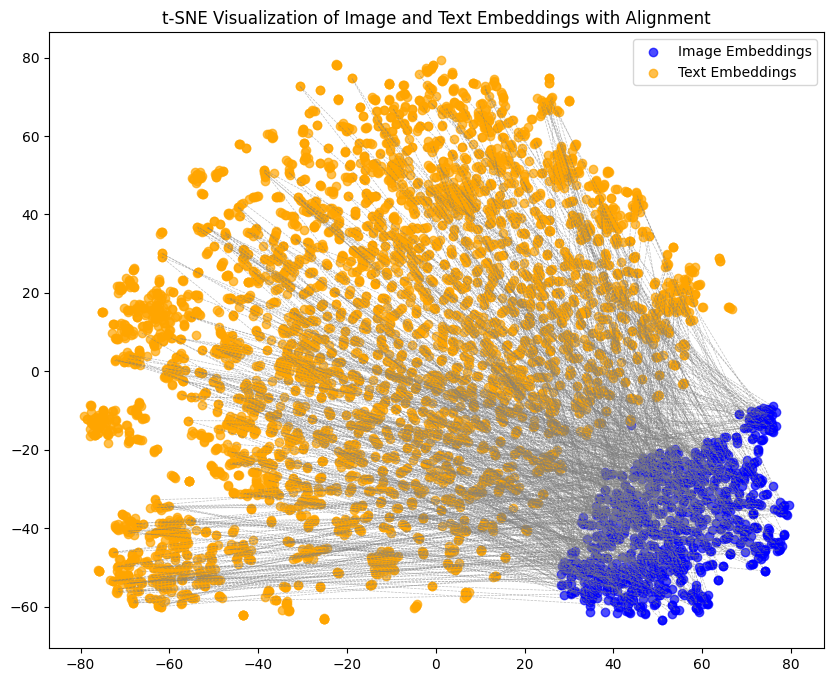

In [155]:

# Set seed
set_seed(42)

# Load Karpathy splits
karpathy_json_path = "/kaggle/input/karpathy-splits/dataset_flickr30k.json"
with open(karpathy_json_path, "r") as f:
    karpathy_data = json.load(f)

# Extract test set
test_data = [item for item in karpathy_data["images"] if item["split"] == "test"]

image_folder = "/kaggle/input/flickr30k/Images"

# Extract embeddings
image_embeddings, text_embeddings, labels = extract_embeddings(
    model.visual,  # Access the visual encoder
    model.encode_text,  # Access the text encoder
    test_data, 
    preprocess_val, 
    tokenizer, 
    device,
    image_folder  # Pass the image folder path
)

# Compute metrics
modality_gap = compute_modality_gap(image_embeddings, text_embeddings, metric="euclidean")  # or "cosine"
uniformity = compute_uniformity(image_embeddings)
cross_modal_alignment = compute_cross_modal_alignment(image_embeddings, text_embeddings)

# Print results
print(f"Modality Gap: {modality_gap}")
print(f"Uniformity of Image Space: {uniformity}")
print(f"Cross-Modal Alignment (Image-Text): {cross_modal_alignment}")

# Visualize embeddings
visualize_embeddings(image_embeddings, text_embeddings)

Modality Gap: 0.9367064237594604
Uniformity of Image Space: -1.9863855838775635
Cross-Modal Alignment (Image-Text): 0.09906081110239029


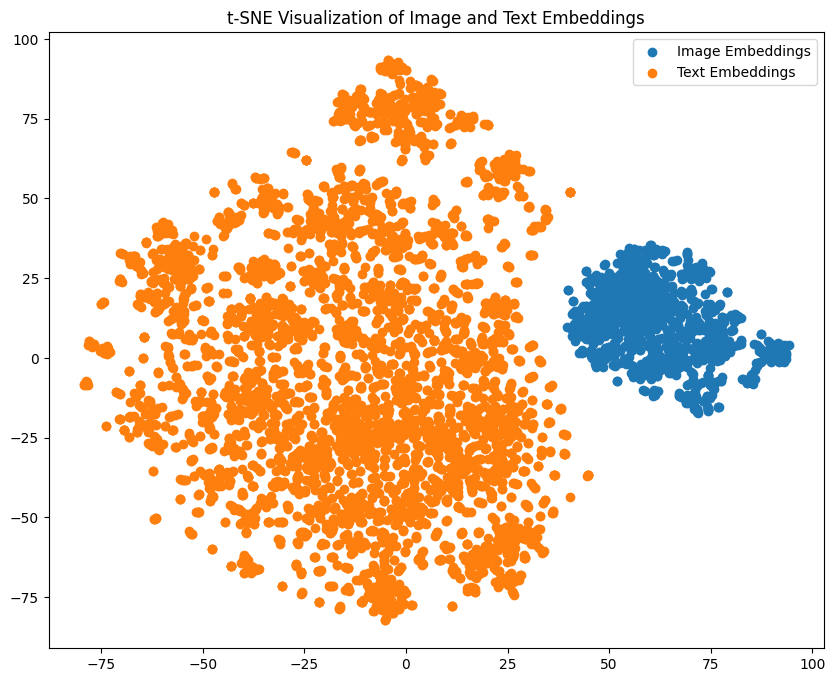

In [145]:
# Set seed
set_seed(42)

# Load Karpathy splits
karpathy_json_path = "/kaggle/input/karpathy-splits/dataset_flickr30k.json"
with open(karpathy_json_path, "r") as f:
    karpathy_data = json.load(f)

# Extract test set
test_data = [item for item in karpathy_data["images"] if item["split"] == "test"]

image_folder = "/kaggle/input/flickr30k/Images"

# Extract embeddings
image_embeddings, text_embeddings, labels = extract_embeddings(
    model_ft.visual,  # Access the visual encoder
    model_ft.encode_text,  # Access the text encoder
    test_data, 
    preprocess_val, 
    tokenizer, 
    device,
    image_folder  # Pass the image folder path
)

# Compute metrics
modality_gap = compute_modality_gap(image_embeddings, text_embeddings, metric="euclidean")  # or "cosine"
uniformity = compute_uniformity(image_embeddings)
cross_modal_alignment = compute_cross_modal_alignment(image_embeddings, text_embeddings)

# Print results
print(f"Modality Gap: {modality_gap}")
print(f"Uniformity of Image Space: {uniformity}")
print(f"Cross-Modal Alignment (Image-Text): {cross_modal_alignment}")

# Visualize embeddings
visualize_embeddings(image_embeddings, text_embeddings)

Modality Gap: 0.9465891122817993
Uniformity of Image Space: -1.6244961023330688
Cross-Modal Alignment (Image-Text): 0.10211280733346939


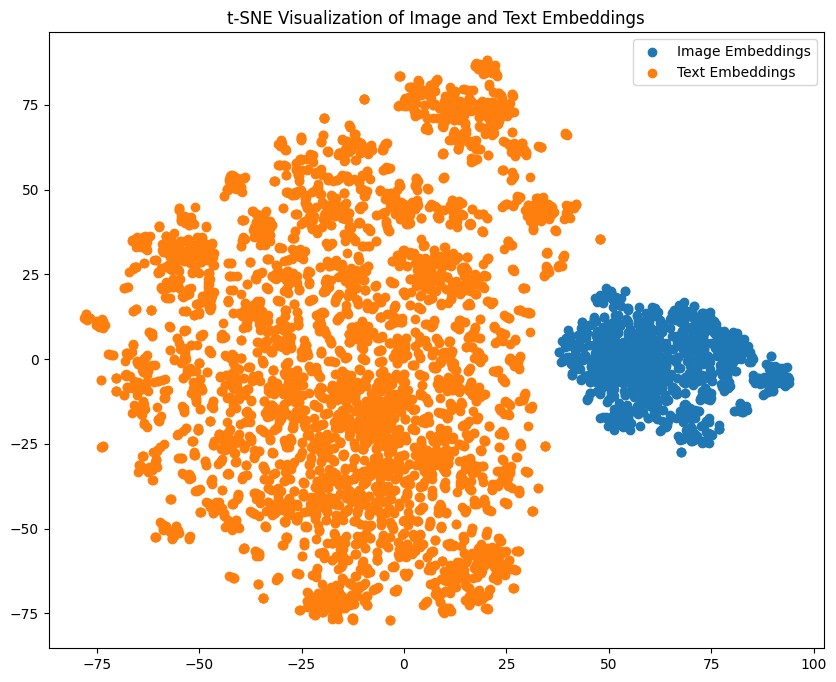

In [151]:
# Set seed
set_seed(42)

# Load Karpathy splits
karpathy_json_path = "/kaggle/input/karpathy-splits/dataset_flickr30k.json"
with open(karpathy_json_path, "r") as f:
    karpathy_data = json.load(f)

# Extract test set
test_data = [item for item in karpathy_data["images"] if item["split"] == "test"]

image_folder = "/kaggle/input/flickr30k/Images"

# Extract embeddings
image_embeddings, text_embeddings, labels = extract_embeddings(
    model_ft_mod_0_1.visual,  # Access the visual encoder
    model_ft_mod_0_1.encode_text,  # Access the text encoder
    test_data, 
    preprocess_val, 
    tokenizer, 
    device,
    image_folder  # Pass the image folder path
)

# Compute metrics
modality_gap = compute_modality_gap(image_embeddings, text_embeddings, metric="euclidean")  # or "cosine"
uniformity = compute_uniformity(image_embeddings)
cross_modal_alignment = compute_cross_modal_alignment(image_embeddings, text_embeddings)

# Print results
print(f"Modality Gap: {modality_gap}")
print(f"Uniformity of Image Space: {uniformity}")
print(f"Cross-Modal Alignment (Image-Text): {cross_modal_alignment}")

# Visualize embeddings
visualize_embeddings(image_embeddings, text_embeddings)

Modality Gap: 0.9425634741783142
Uniformity of Image Space: -1.4427495002746582
Cross-Modal Alignment (Image-Text): 0.10284166038036346


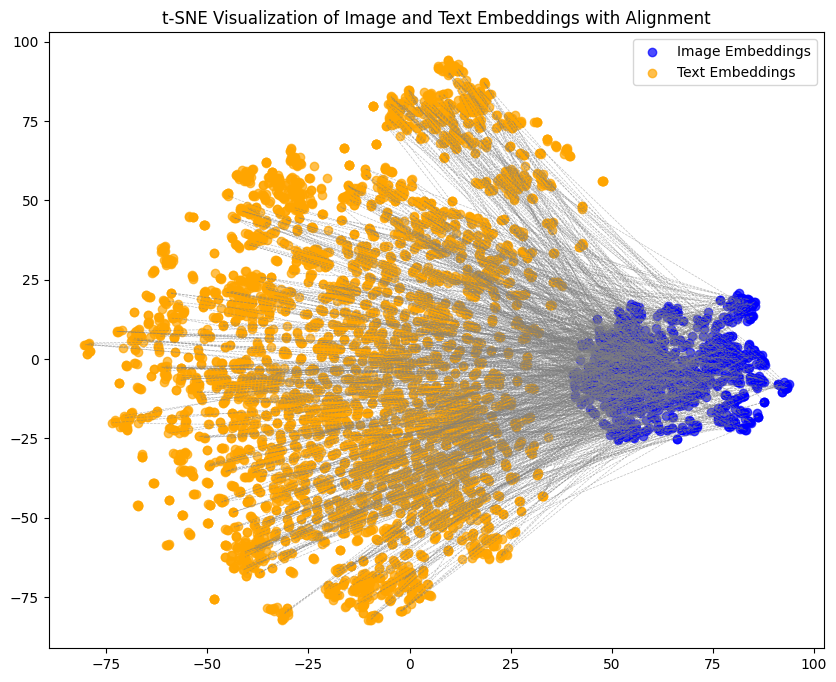

In [154]:
# Set seed
set_seed(42)

# Load Karpathy splits
karpathy_json_path = "/kaggle/input/karpathy-splits/dataset_flickr30k.json"
with open(karpathy_json_path, "r") as f:
    karpathy_data = json.load(f)

# Extract test set
test_data = [item for item in karpathy_data["images"] if item["split"] == "test"]

image_folder = "/kaggle/input/flickr30k/Images"

# Extract embeddings
image_embeddings, text_embeddings, labels = extract_embeddings(
    model_ft_mod_0_25.visual,  # Access the visual encoder
    model_ft_mod_0_25.encode_text,  # Access the text encoder
    test_data, 
    preprocess_val, 
    tokenizer, 
    device,
    image_folder  # Pass the image folder path
)

# Compute metrics
modality_gap = compute_modality_gap(image_embeddings, text_embeddings, metric="euclidean")  # or "cosine"
uniformity = compute_uniformity(image_embeddings)
cross_modal_alignment = compute_cross_modal_alignment(image_embeddings, text_embeddings)

# Print results
print(f"Modality Gap: {modality_gap}")
print(f"Uniformity of Image Space: {uniformity}")
print(f"Cross-Modal Alignment (Image-Text): {cross_modal_alignment}")

# Visualize embeddings
visualize_embeddings(image_embeddings, text_embeddings)